# Computer Vision Bootcamp: Assignment 2

## Reading

*Take* a photo of any object in your room using your mobile or laptop's camera

Upload the image into Colab. Then read the image

In [70]:
# Import the needed libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import time
from functools import wraps

### General Purpose Operations

In [71]:
def show_image(img, title=None):
    """
    Display an image with an optional title.

    Args:
    - img: The image to be displayed.
    - title: Optional title for the image.

    Returns:
    - None
    """
    if title is None:
        title = "Gray View" if len(img.shape) < 3 else "RGB View"

    if len(img.shape) >= 3:
        img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

    plt.title(title)
    plt.imshow(img, cmap="gray" if len(img.shape) < 3 else None)
    plt.show()


def show_images_figure(images, titles):
    """
    Display multiple images in a single figure with corresponding titles.

    Args:
    - images: List of images to be displayed.
    - titles: List of titles for each image.

    Returns:
    - None
    """
    if len(images) != len(titles):
        raise ValueError("The number of images does not match the number of titles.")
    num_images = len(images)
    plt.figure(figsize=(num_images * 5, 5))
    for i, (image, title) in enumerate(zip(images, titles), start=1):
        plt.subplot(1, num_images, i)
        plt.title(title)
        plt.imshow(image, cmap="gray")
        plt.axis('off')
    plt.show()

def plot_one_histogram(images, colors=None, labels=None, title=None):
    """
    Plot histograms for multiple images in a single figure.

    Args:
    - images: List of images for which histograms will be plotted.
    - colors: List of colors for each histogram (optional).
    - labels: List of labels for each histogram (optional).
    - title: Title for the plot (optional).

    Returns:
    - None
    """
    if colors is None:
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
    if labels is None:
        labels = [f'Channel {i+1}' for i in range(len(images))]

    plt.figure(figsize=(8, 4))

    for i, image in enumerate(images):
        if i < len(colors):
            color = colors[i]
        else:
            color = colors[-1]  # Use the last color for additional images

        hist = cv.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color=color, label=labels[i])

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(title if title else 'Histograms of Images')

    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_multiple_histograms(images, colors=None, labels=None):
    """
    Plot histograms for multiple images in a single figure.

    Args:
    - images: List of images for which histograms will be plotted.
    - colors: List of colors for each histogram (optional).
    - labels: List of labels for each histogram (optional).

    Returns:
    - None
    """
    hist_num = len(images)
    plt.figure(figsize=(hist_num * 5, 5))

    for i in range(hist_num):
        image = images[i]

        if colors is not None:
            color = colors[i] if i < len(colors) else None
        else:
            color = None

        if labels is not None:
            label = labels[i] if i < len(labels) else None
        else:
            label = None

        # Calculate the histogram for the current image
        hist = cv.calcHist([image], [0], None, [256], [0, 256])

        plt.subplot(1, hist_num, i+1)
        plt.plot(hist, color=color, label=label)

        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title(f'Histogram {i+1}' if label is None else label)

        plt.grid(True)

    plt.tight_layout()
    plt.show()


def measure_exec_time(func):
    @wraps(func)
    def wrapper(*args, **kwargs):
        start_time = time.time()
        # Call the original function
        result = func(*args, **kwargs)
        end_time = time.time()
        execution_time = end_time - start_time

        print(f"Execution time for {func.__name__}: {execution_time:.5f} seconds")
        return result

    return wrapper

### Reading First Image (Tomato)

In [72]:
# read the 1st image

tomato = cv.imread("extract.jpg")

### Reading Second Image (Chroma)

In [73]:
# read the 2nd image

chroma = cv.imread("segment.jpg")

Resize the image to 512*512 pixels using the resize function in OpenCV

In [74]:
# Resize the images

resized_tomato_img = cv.resize(tomato, (512, 512))
resized_chroma_img = cv.resize(chroma, (512, 512))

## Converting

...::: Tomato RGB & Gray :::...


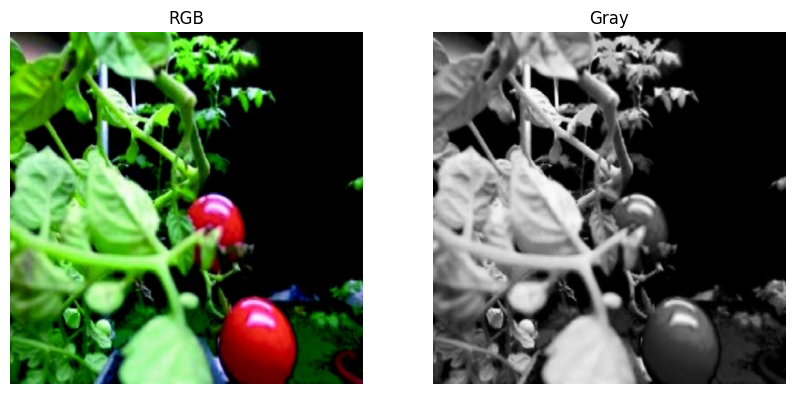

...::: Chroma RGB & Gray :::...


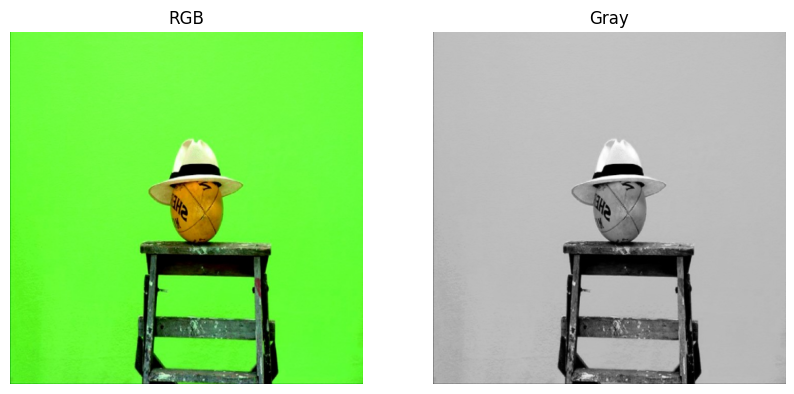

In [75]:
# Convert the reseized image to RGB
rgb_tomato = cv.cvtColor(resized_tomato_img, cv.COLOR_BGR2RGB)
rgb_chroma = cv.cvtColor(resized_chroma_img, cv.COLOR_BGR2RGB)

# Convert the reseized image to grayscale
gray_tomato = cv.cvtColor(resized_tomato_img, cv.COLOR_BGR2GRAY)
gray_chroma = cv.cvtColor(resized_chroma_img, cv.COLOR_BGR2GRAY)

# show the rgb and Gray images

img_titles = ["RGB", "Gray"]

print("...::: Tomato RGB & Gray :::...")
show_images_figure([rgb_tomato, gray_tomato], img_titles)

print("...::: Chroma RGB & Gray :::...")
show_images_figure([rgb_chroma, gray_chroma], img_titles)

## Edge Detection

### Laplacian of Gaussian


...::: Tomato Figure :::...



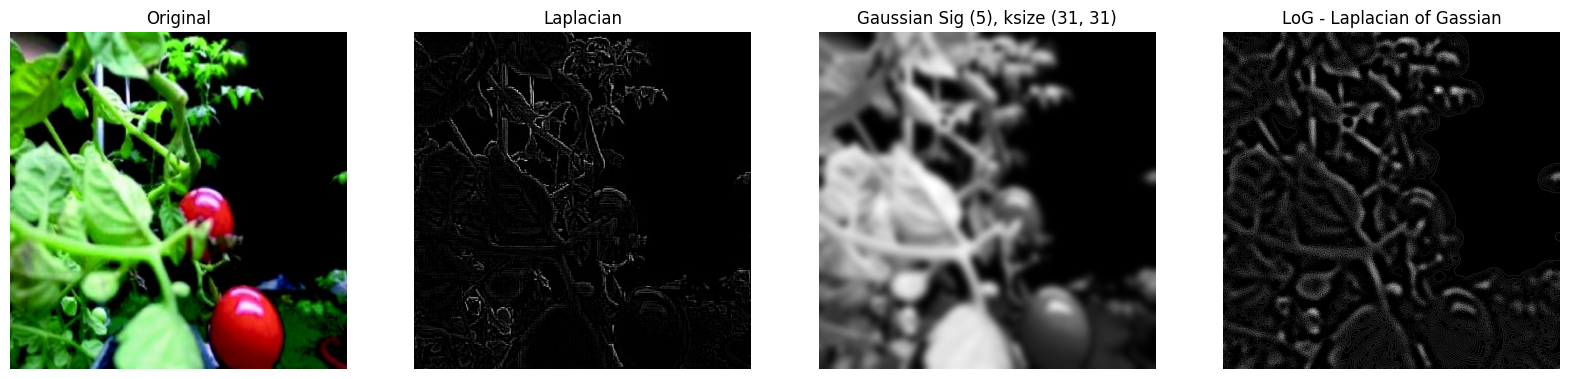


...::: Chroma Figure :::...



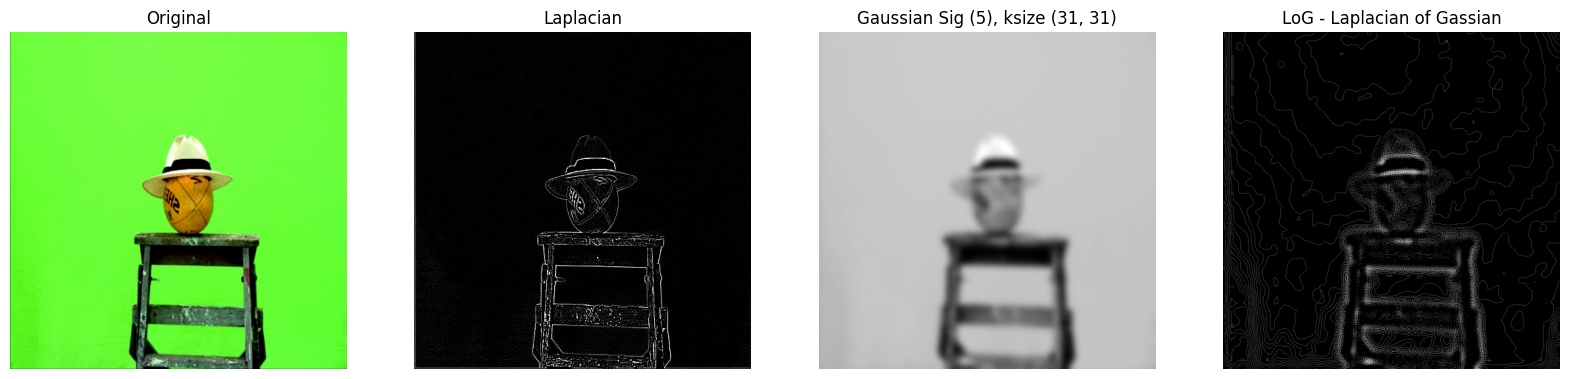

In [76]:
# Convolve the gray resized image with a Laplacian
laplacian_filter = np.array([ [-1, -1, -1],
                              [-1, 8, -1],
                              [-1, -1, -1]])

laplacian_edges_tomato = cv.filter2D(gray_tomato, -1, laplacian_filter)
laplacian_edges_chroma = cv.filter2D(gray_chroma, -1, laplacian_filter)

# Convolve the gray resized image with a Gaussian of sigma 5
gaussian_sigma = 5
gaussian_kernel_size = (31, 31)

gaussian_sig5_tomato = cv.GaussianBlur(gray_tomato, gaussian_kernel_size , gaussian_sigma)
gaussian_sig5_chroma = cv.GaussianBlur(gray_chroma, gaussian_kernel_size , gaussian_sigma)

# Find the Laplacian of Gaussian
log_tomato = cv.filter2D(gaussian_sig5_tomato, -1, laplacian_filter)
log_chroma = cv.filter2D(gaussian_sig5_chroma, -1, laplacian_filter)

# Show the original image, the laplacian, the gaussian, and the Laplacian of Gaussian results in one figure
print("\n...::: Tomato Figure :::...\n")

tomato_images = [rgb_tomato, laplacian_edges_tomato, gaussian_sig5_tomato, log_tomato]
tomato_titles = ["Original", "Laplacian", f"Gaussian Sig ({gaussian_sigma}), ksize {gaussian_kernel_size}", "LoG - Laplacian of Gassian"]
show_images_figure(tomato_images, tomato_titles)

print("\n...::: Chroma Figure :::...\n")

chroma_images = [rgb_chroma, laplacian_edges_chroma, gaussian_sig5_chroma, log_chroma]
chroma_titles = ["Original", "Laplacian", f"Gaussian Sig ({gaussian_sigma}), ksize {gaussian_kernel_size}", "LoG - Laplacian of Gassian"]
show_images_figure(chroma_images, chroma_titles)

### Difference of Gaussians


...::: Tomato Figure :::...



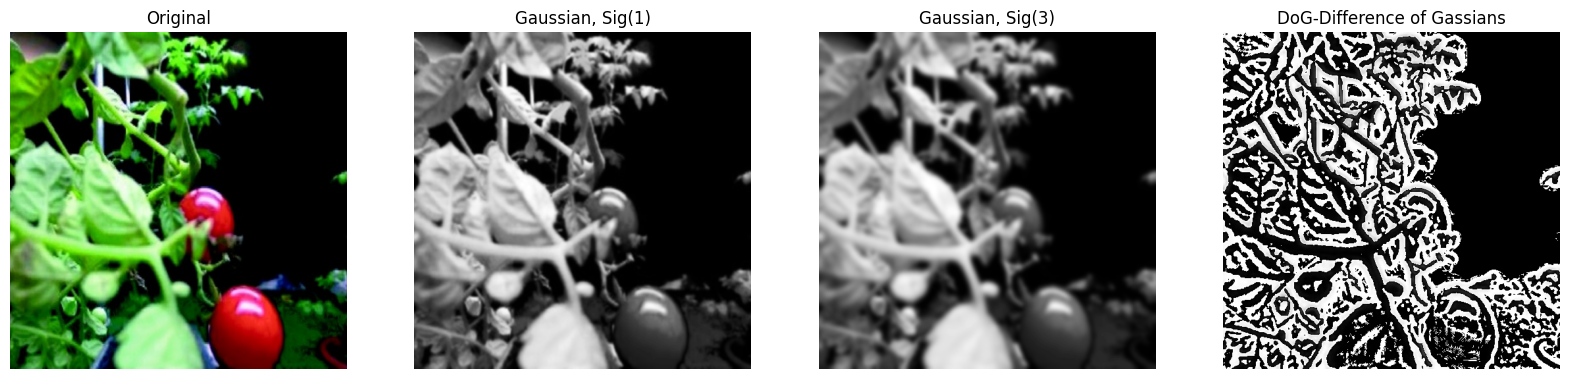


...::: Chroma Figure :::...



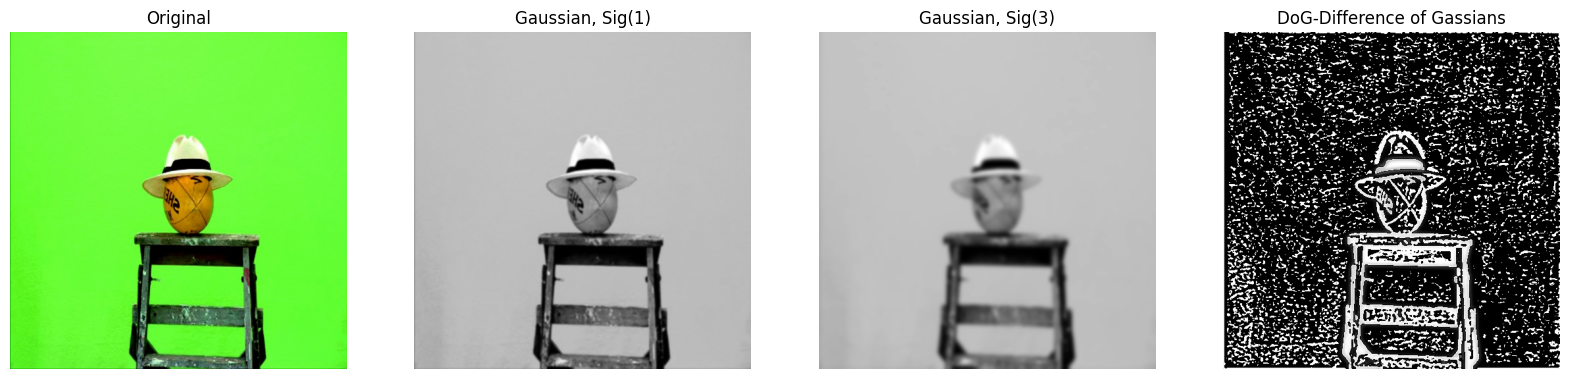

In [77]:
# Convolve the gray resized image with two gaussians (one with a scale of 1 and another with a scale of 3)
gaussian_sigma1 = 1
gaussian_sigma3 = 3

gaussian_kernel_size = (19, 19)

gaussian_sig1_tomato = cv.GaussianBlur(gray_tomato, gaussian_kernel_size , gaussian_sigma1)
gaussian_sig3_tomato = cv.GaussianBlur(gray_tomato, gaussian_kernel_size , gaussian_sigma3)


gaussian_sig1_chroma = cv.GaussianBlur(gray_chroma, gaussian_kernel_size , gaussian_sigma1)
gaussian_sig3_chroma = cv.GaussianBlur(gray_chroma, gaussian_kernel_size , gaussian_sigma3)


# find the difference of gaussians

dog_tomato = gaussian_sig1_tomato - gaussian_sig3_tomato

dog_chroma = gaussian_sig1_chroma - gaussian_sig3_chroma

# Show the origional image, the two gaussians results, and the DoG results

print("\n...::: Tomato Figure :::...\n")

tomato_images = [rgb_tomato, gaussian_sig1_tomato, gaussian_sig3_tomato, dog_tomato]
tomato_titles = ["Original", f"Gaussian, Sig({gaussian_sigma1})", f"Gaussian, Sig({gaussian_sigma3})", "DoG-Difference of Gassians"]
show_images_figure(tomato_images, tomato_titles)


print("\n...::: Chroma Figure :::...\n")

chroma_images = [rgb_chroma, gaussian_sig1_chroma, gaussian_sig3_chroma, dog_chroma]
chroma_titles = ["Original", f"Gaussian, Sig({gaussian_sigma1})", f"Gaussian, Sig({gaussian_sigma3})", "DoG-Difference of Gassians"]
show_images_figure(chroma_images, chroma_titles)

### Canny Edge Detector

Tomato Median = 53.0
Tomato Lower = 36
Tomato Upper = 69


Chroma Median = 187.0
Chroma Lower = 127
Chroma Upper = 246


...::: Tomato Figure:::...



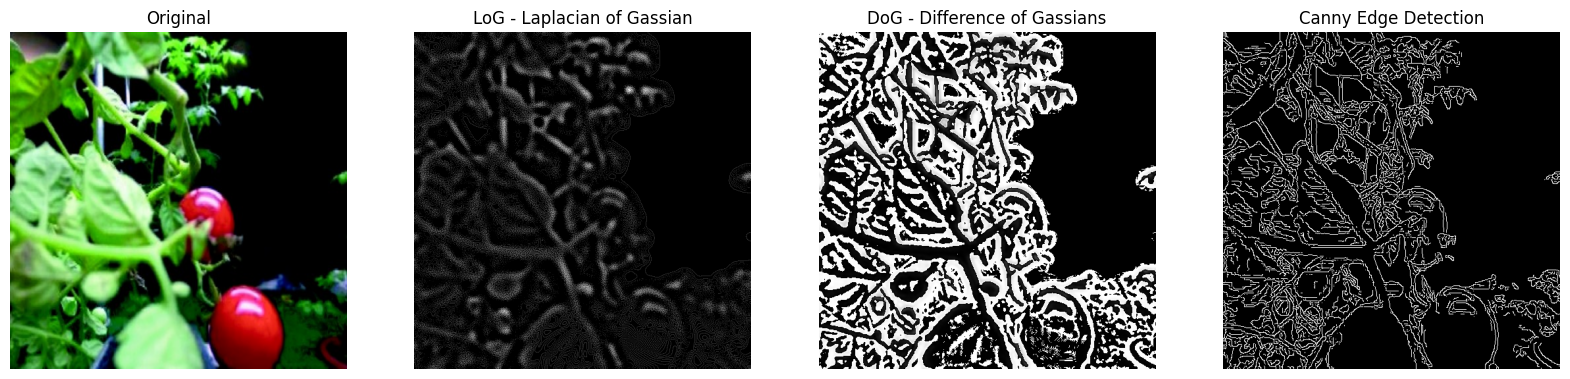


...::: Chroma Figure:::...



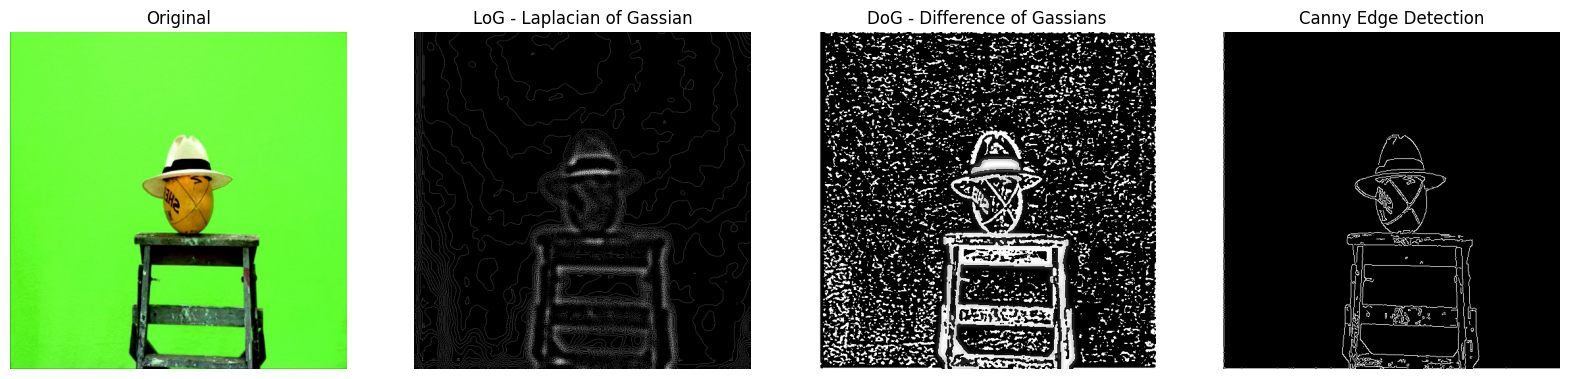

In [78]:
# Find the median then the two thresholds of the gray resized image, and print the three values

median_tomato = np.median(gray_tomato)
lower_tomato = int(median_tomato * 0.68)
upper_tomato = int(median_tomato * 1.32)

print("Tomato Median =", median_tomato)
print("Tomato Lower =", lower_tomato)
print("Tomato Upper =", upper_tomato, end="\n\n\n")


median_chroma = np.median(gray_chroma)
lower_chroma = int(median_chroma * 0.68)
upper_chroma = int(median_chroma * 1.32)

print("Chroma Median =", median_chroma)
print("Chroma Lower =", lower_chroma)
print("Chroma Upper =", upper_chroma, end="\n\n\n")

# Apply automatic Canny edge detection using the computed thresholds
canny_tomato = cv.Canny(gray_tomato, lower_tomato, upper_tomato)

canny_chroma = cv.Canny(gray_chroma, lower_chroma, upper_chroma)

# show the original image, the LoG, the DoG, and the Canny results in one figure

print("...::: Tomato Figure:::...\n")

tomato_images = [rgb_tomato, log_tomato, dog_tomato, canny_tomato]
tomato_titles = ["Original", "LoG - Laplacian of Gassian" , "DoG - Difference of Gassians", "Canny Edge Detection"]
show_images_figure(tomato_images, tomato_titles)


print("\n...::: Chroma Figure:::...\n")

chroma_images = [rgb_chroma, log_chroma, dog_chroma, canny_chroma]
chroma_titles = ["Original", "LoG - Laplacian of Gassian" , "DoG - Difference of Gassians", "Canny Edge Detection"]
show_images_figure(chroma_images, chroma_titles)

## Morphological Operations

### Opening or Closing


...::: Tomato Figure :::...



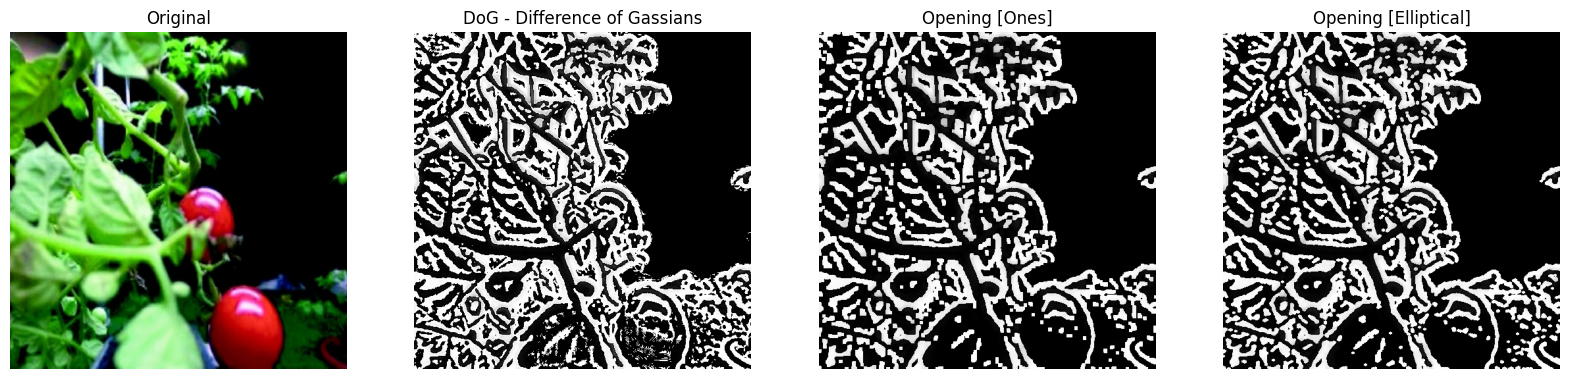


...::: Chroma Figure:::...



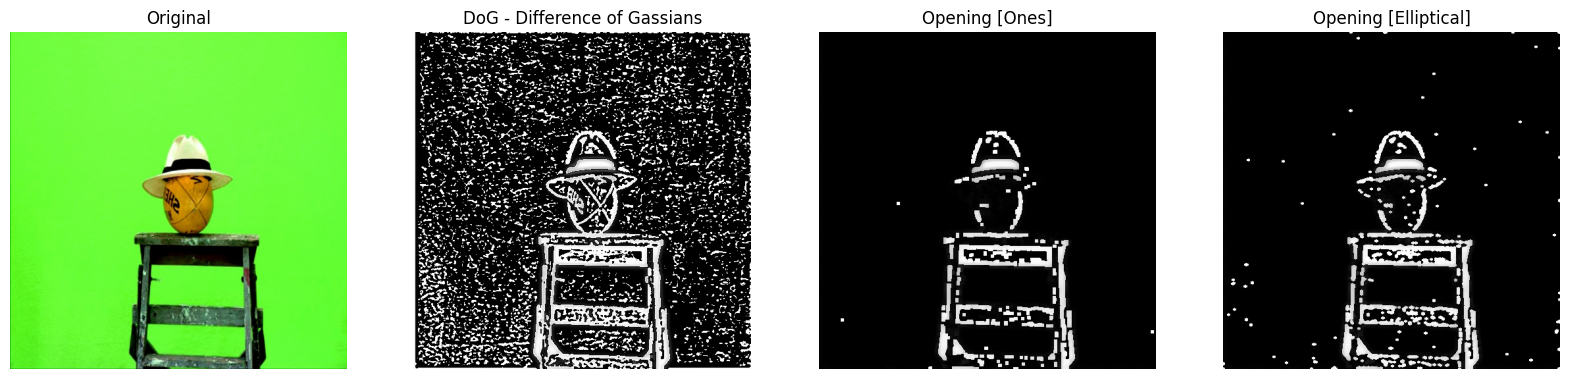

In [79]:
# enhance the DoG results using opening or closing, create a mask with suitable size and shape then use opening or closing

kernel_size = (5, 5)
ones_kernel = np.ones([5, 5]) # structural Element

# After different trials with different kernels and sizes, I used opening morphology process using ones and elliptical kernels to enhance DoG.

elliptical_kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE, kernel_size)

ones_opening_tomato = cv.morphologyEx(dog_tomato, cv.MORPH_OPEN, ones_kernel)
elliptical_opening_tomato = cv.morphologyEx(dog_tomato, cv.MORPH_OPEN, elliptical_kernel)


ones_opening_chroma = cv.morphologyEx(dog_chroma, cv.MORPH_OPEN, ones_kernel)
elliptical_opening_chroma = cv.morphologyEx(dog_chroma, cv.MORPH_OPEN, elliptical_kernel)


# show the origional Dog and the enhanced DoG

print("\n...::: Tomato Figure :::...\n")

tomato_images = [rgb_tomato, dog_tomato, ones_opening_tomato, elliptical_opening_tomato]
tomato_titles = ["Original", "DoG - Difference of Gassians", "Opening [Ones]", "Opening [Elliptical]"]
show_images_figure(tomato_images, tomato_titles)  # Elliptical looks the best

print("\n...::: Chroma Figure:::...\n")

chroma_images = [rgb_chroma, dog_chroma, ones_opening_chroma, elliptical_opening_chroma]
chroma_titles = ["Original", "DoG - Difference of Gassians", "Opening [Ones]", "Opening [Elliptical]"]
show_images_figure(chroma_images, chroma_titles) # Ones looks better

### Histogram and Binarization

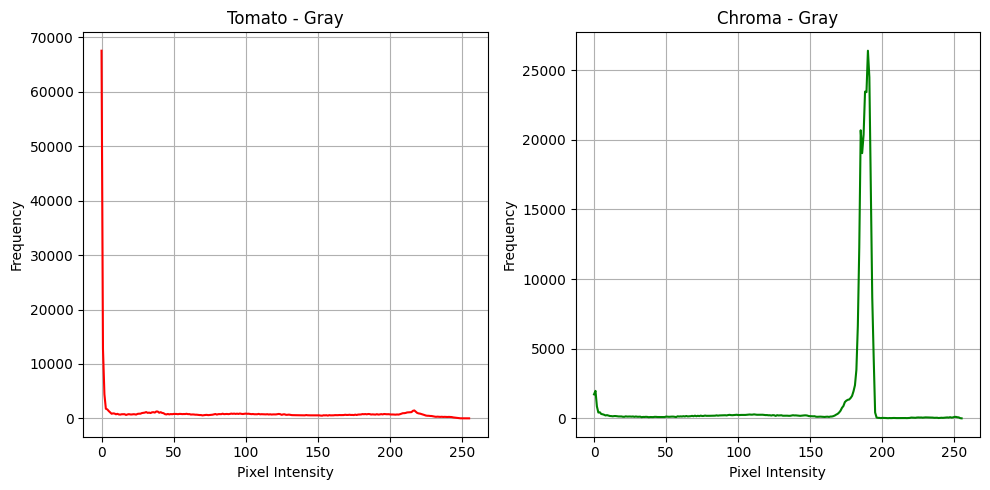

In [80]:
# Find the histogram of the gray resized image and plot it
plot_multiple_histograms([gray_tomato, gray_chroma], colors=["Red", "Green"], labels=["Tomato - Gray", "Chroma - Gray"])


...:::Tomato Histograms:::...



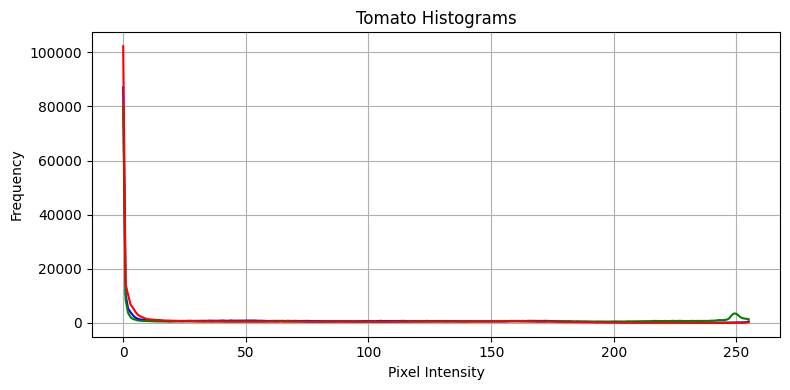


...:::Chroma Histograms:::...



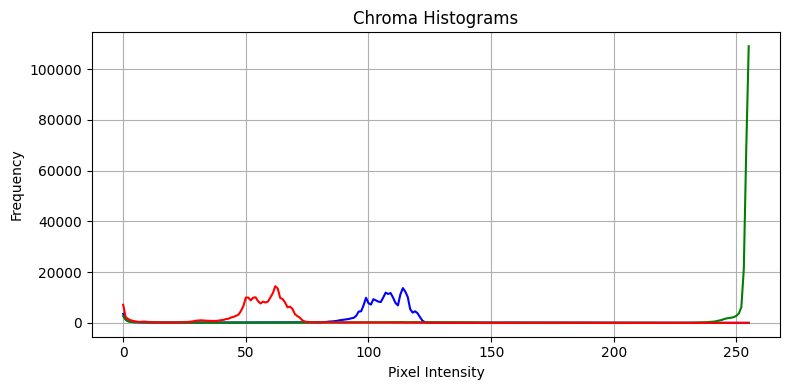

In [81]:
# Calculate the histogram for each color channel and show them in one plot

print("\n...:::Tomato Histograms:::...\n")

tomato_r, tomato_g, tomato_b = cv.split(rgb_tomato)
colors=["Blue", "Green", "Red"]

plot_one_histogram([tomato_r, tomato_g, tomato_b], colors=colors, title="Tomato Histograms")

print("\n...:::Chroma Histograms:::...\n")

chroma_r, chroma_g, chroma_b = cv.split(rgb_chroma)

plot_one_histogram([chroma_r, chroma_g, chroma_b], colors=colors, title="Chroma Histograms")


...:::Tomato Binarization:::...



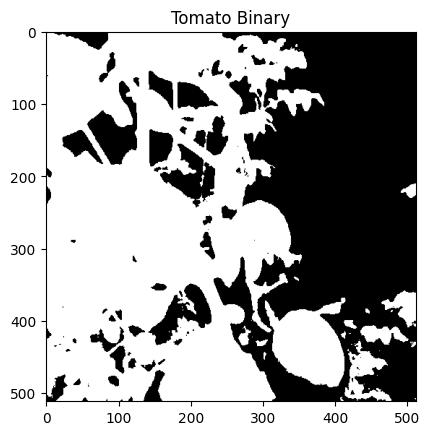


...:::Chroma Binarization:::...



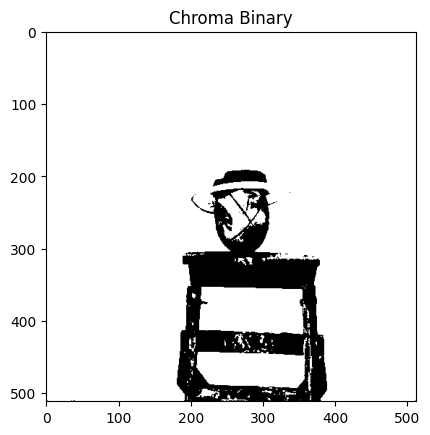

In [82]:
# Using the peak of the histogram or the median value, binarise the gray scale image and show it.

print("\n...:::Tomato Binarization:::...\n")

_, binary_tomato = cv.threshold(gray_tomato, lower_tomato, upper_tomato, cv.THRESH_BINARY)
# OR
# binary_tomato2 = np.where(gray_tomato > median_tomato, 255, 0)

show_image(binary_tomato, title="Tomato Binary")


print("\n...:::Chroma Binarization:::...\n")

_, binary_chroma = cv.threshold(gray_chroma, lower_chroma, upper_chroma, cv.THRESH_BINARY)

show_image(binary_chroma, title="Chroma Binary")

## Color Segmentation

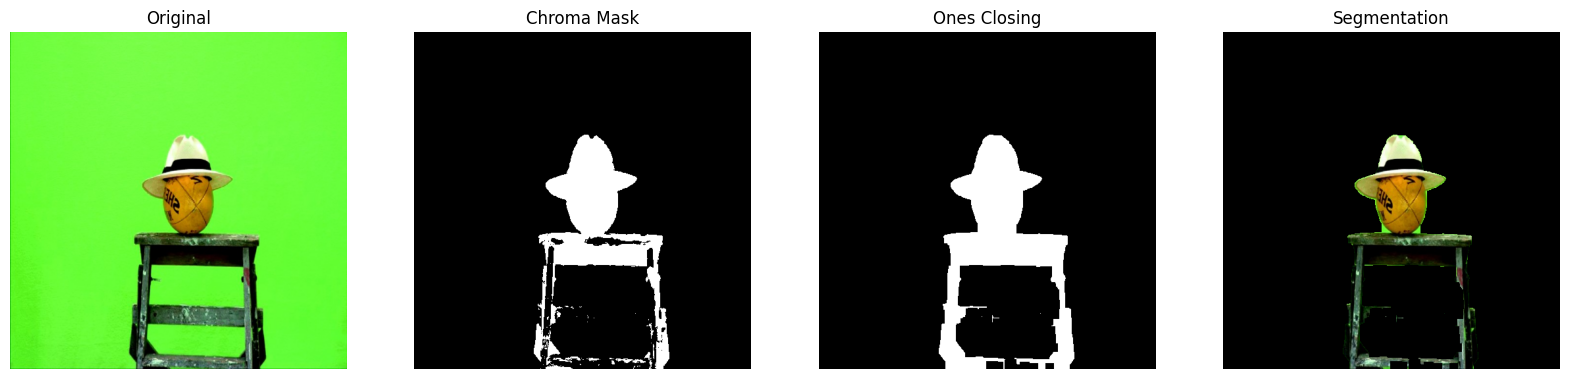

In [83]:
# Load the image attached to the assignment called "segment"

# (((((Already loaded before)))))

# Convert to suitable color space

hsv_chroma = cv.cvtColor(rgb_chroma, cv.COLOR_RGB2HSV)


# Define the color range for segmentation, we want to extract the object. Hint: you can extract the green then inverse the mask
lower_green = np.array([50, 50, 50])
upper_green = np.array([110, 255, 255])


# Create a mask with the specified color range
mask = cv.inRange(hsv_chroma, lower_green, upper_green)

# To extract everything except the green color, I will inverse the green mask
chroma_mask = cv.bitwise_not(mask)


# enhance the mask using morphological operations
ones_kernel = np.ones([13, 13]) # structural Element
ones_closing_chroma = cv.morphologyEx(chroma_mask, cv.MORPH_CLOSE, ones_kernel)


# apply the mask on the original RGB image
filtered_image = cv.bitwise_and(rgb_chroma, rgb_chroma, mask=ones_closing_chroma)


# Display the original and segmented images
show_images_figure([rgb_chroma, chroma_mask, ones_closing_chroma, filtered_image], ["Original", "Chroma Mask", "Ones Closing", "Segmentation"])

## Feature extraction

### Harris

Execution time for harris_extraction: 0.00536 seconds
Harris Thershold 700343.28


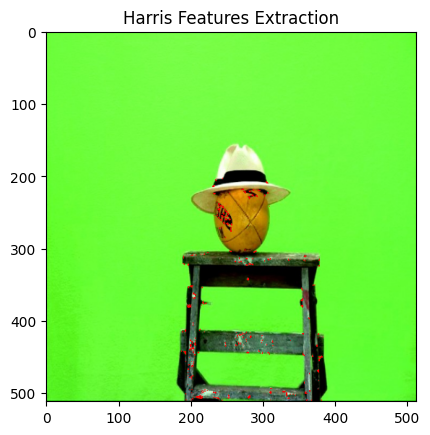

In [87]:
# Load the image attached to the assignment called "extract"
# (((((Already loaded before)))))

# convert it to suitable color space and value type for Harries function
gray_chroma32 = np.float32(gray_chroma)

@measure_exec_time
def harris_extraction():
    # Apply Harris function, and print its execution time
    return cv.cornerHarris(gray_chroma32, blockSize=2, ksize=3, k=0.04)

harris = harris_extraction()


# filter the number of corners and show them in red on the origional RGB image
harris_thershold = harris.max() * 0.01
print("Harris Thershold", harris_thershold)

resized_chroma_img[harris>harris_thershold] = [0,0,255]
show_image(resized_chroma_img, title="Harris Features Extraction")

### SIFT

Execution time for sift_extraction: 0.10530 seconds
SIFT Key Points Number: 450


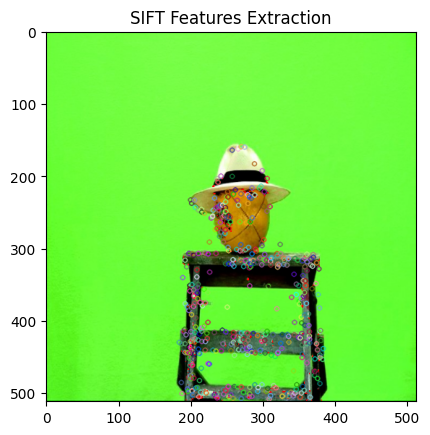

In [88]:
# convert it to suitable color space and value type for SIFT function
# (((((Already done before)))))

# Apply SIFT function, and print its execution time and number of keypoints
sift = cv.SIFT_create()

@measure_exec_time
def sift_extraction():
    return sift.detectAndCompute(gray_chroma, None)

keypts_sift, descriptor_sift = sift_extraction()

print(f"SIFT Key Points Number: {len(keypts_sift)}")

# show the keypoints on the origional RGB image

image_sift = cv.drawKeypoints(resized_chroma_img, keypts_sift, None)

show_image(image_sift, title="SIFT Features Extraction")

### Fast

Execution time for fast_extraction: 0.00091 seconds
Fast Key Points Number: 1133


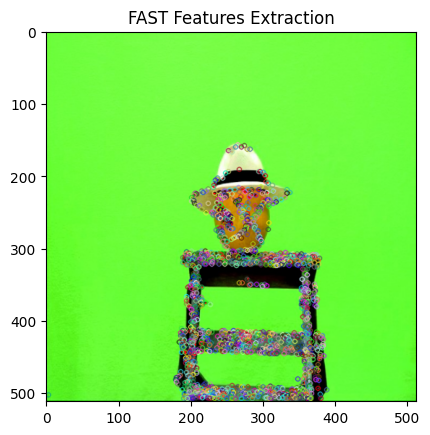

In [86]:
# convert it to suitable color space and value type for Fast function
# (((((Already done before)))))

# Apply Fast function, and print its execution time and number of keypoints
fast = cv.FastFeatureDetector_create()

@measure_exec_time
def fast_extraction():
    return fast.detect(gray_chroma, None)

keypts_fast = fast_extraction()

print(f"Fast Key Points Number: {len(keypts_fast)}")

# show the keypoints on the origional RGB image
image_fast = cv.drawKeypoints(resized_chroma_img, keypts_fast, None)

show_image(image_fast, title="FAST Features Extraction")

## What real life problems can you solve using the methods applied in this assignment?

Your Answer Here: **(I want to write some new ideas rather than the mentioned use cases in the training slides)**

- **Counting Objects** based on contours area.

- **Object Segmentation**, like: Extracting the object from the environment (such as working with robotic arm).

- **Medical Imaging**: Identifying edges in medical images (e.g., X-rays, MRI scans) can help in diagnosing diseases and conditions. For example, detecting edges of tumors or anomalies.

- **Autonomous Vehicles**: Detecting edges of objects in the environment (e.g., vehicles, pedestrians, lanes) can assist in obstacle detection and navigation.

- **Quality Control**: Inspecting manufactured products for defects by detecting edges and anomalies in their shapes or textures.

- **Document Processing**: Enhancing text extraction and document analysis by removing noise, filling gaps, and smoothing characters using opening, closing, and binarization operations.

- **Biomedical Image Processing**: Segmenting and analyzing cell structures in microscopic images by morphological operations to remove noise, separate overlapping cells, and extract features.

- **Forensic Analysis**: Enhancing fingerprint images by removing noise and enhancing ridge structures through morphological operations, enabling better feature extraction and matching.

- **Object Tracking**: Tracking colored objects (such as HSV Color Segmentation) in videos or real-time camera feeds by segmenting regions with specific colors (e.g., tracking a red ball in a soccer game).

- **Traffic Sign Recognition**: Detecting and recognizing traffic signs based on their color and shape features extracted using color segmentation techniques like HSV filtration.

- **Plant Disease Detection**: Identifying diseased parts of plants based on color variations in images captured from agricultural fields using color segmentation techniques.

- **Augmented Reality**: Recognizing and tracking objects in real-time camera feeds for AR applications.

- **Image Matching**: Matching images or finding corresponding points across different views or frames (e.g., panorama stitching, 3D reconstruction) using feature descriptors extracted by algorithms like SIFT or FAST.